<img style="direction:rtl;" src="./../data/besm.png" alt="In the name of Allah" width="150">

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tqdm

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm

In [7]:
chineas_alphabet = ["诶","诶","必","比西","西弟","迪衣","伊艾付","艾弗","记","吉","爱耻","艾尺","挨","艾","宅","杰","开","开","饿罗","艾勒","饿母","艾马","恩","艾娜","呕","","哦","披","屁","酷","吉吾","耳","艾儿","艾斯","艾丝","踢","提","tí忧","伊吾","维","维","大波留","豆贝尔维","埃克斯","艾克斯","歪","吾艾","再得","贼德"]
persian_alphabet = ["آ","ا","ب","پ","ت","س","ج","چ","ح","خ","د","ذ","ر","ز","ژ","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ک","ل","م","ن","و","ه","ی"]
other_alphabet = ["ي", "ڈ", "ۍ", "څ", "ۀ", "ې", "ځ", "ډ", "ټ","ړ", "ڼ","ؤ", "ږ","ښ"]
decorativeـsigns = [" ", ",", ":", "؛", "|", "\\", "*", " ", "٬", "!", "؟", "?", "(", ")", ".", "،"]
number_alphabet = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "۰", "۱", "۲", "۳", "۴", "۵", "۶", "۷", "۸", "۹"]

In [8]:
emojis_df = pd.read_csv("./../data/emojis.csv", names=["emoji", "desciption"])
emoji_alphabet = emojis_df.emoji.to_numpy()
emojis_df.head()

,emoji,desciption
0,😀,Grinning Face
1,😁,Beaming Face With Smiling Eyes
2,😂,Face With Tears of Joy
3,🤣,Rolling on the Floor Laughing
4,😃,Grinning Face With Big Eyes


<div style="direction:rtl;">در این مرحله یک پیش&zwnj;پردازش اولیه انجام می&zwnj;شود:</div>
<div style="direction:rtl;">- حذف <code>n\</code> های اضافه متن که منجر به اضافه شدن خطوط شده است</div>
<div style="direction:rtl;">- حذف مواردی که به دلیل اشتباه تایپی یا ... tab زده شده است و به دلیل این که در فایل به عنوان delimiter از tab استفاده شده است، این موارد را با یک tab جایگزین می کنیم.</div>

In [9]:
def check_file_and_extract_data(num):
    f = open(f'./../result/comments_{num}.txt', 'r')
    text = f.readlines()
    f.close()

    text = [x.replace('\n', '').replace('\t\t', '\t').split('\t') for x in text]

    i = 0
    while i < len(text):
        if len(text[i]) == 2:
            i += 1
            text[i-1].append(text[i])
            text[i] = []
        i += 1

    while [] in text:
        text.remove([])
    
    for i, x in enumerate(text):
        if len(x) != 3 and x != []:
            print(f'ERROR [{i}]')
    return text

In [68]:
data = []
for i in range(1,4):
    data.extend(check_file_and_extract_data(i))

comments_data = [c[2] for c in data]
print(f'Comments number: {len(data)}')

Comments number: 708934


<div style="direction:rtl;">تابع <code>get_comments_with_emoji</code> لیستی از کامنت&zwnj;ها را دریافت می کند و در خروجی کامنت&zwnj;هایی را بر می&zwnj;گرداند که حتما دارای حداقل یک <strong>ایموجی</strong> باشند.</div>
<div style="direction:rtl;">برای این منظور، بررسی می&zwnj;کند که آیا هرکدام از الفبای ایموجی موجود حداقل یکبار در متن وجود داشته است یا خیر. در صورت وجود آن را به لیست اضافه می کند.</div>

In [12]:
def get_comments_with_emoji(comments):
    comment_texts = []
    for comment in comments:
        for emoji in emoji_alphabet:
            if type(comment) == str:
                if emoji in comment:
                    comment_texts.append(comment)
                    break
    return comment_texts

<div style="direction:rtl;">به کمک تابع <code>get_comments_with_emoji</code> کامنت هایی که دارای ایموجی هستند را استخراج می‌کنیم</div>

In [69]:
comments_with_emoji = get_comments_with_emoji(comments_data)

f = open("./../result/comments_with_emoji.txt", "w")
for comment in comments_with_emoji:
    f.write(f"{comment}\n")
f.close()

len(comments_with_emoji)

90796

<div style="direction:rtl;">این تابع به منظور استخراج مقادیری از دیکشنری ورودی است که بزرگتر از مقدار <code>value</code> باشند.</div>

In [14]:
def get_gt_value(my_dict, value):
    '''
    Get values from dictionary that grater than "value"
    '''
    return {x:y for x,y in my_dict.items() if y>value}

<div style="direction:rtl;">تابع نمایش چند مورد اول لیست</div>

In [15]:
def head_list(lst, until=5, sep=' '):
    '''
    Print top "until" item of list
    '''
    result = ''
    num = 0
    for i in lst:
        if num == until:
            result += f'{i}'
        else:
            result += f'{i}{sep}'
        num += 1
        if num > until:
            break
    print(result)

<div style="direction:rtl;">یک دیکشنری از ایموجی ها ساخته و تعداد هرکدام را در آن ذخیره می‌کنیم و در نهایت یک مرتب سازی براساس تعداد انجام می دهیم.</div>
<div style="direction:rtl;">در زمان شمارش، برای هر خط درصورتی که چندبار از یک ایموجی استفاده شده باشد، آن ایموجی فقط یکبار در شمارش به حساب خواهد آمد.</div>

In [17]:
emoji_dict = {}

for emoji in emoji_alphabet:
    emoji_dict[emoji] = 0

for comment in comments_with_emoji:
    tmp_lst = []
    for s in comment:
        if s in emoji_alphabet:
            tmp_lst.append(s)
    for e in list(dict.fromkeys(tmp_lst)):
        emoji_dict[e] += 1

emoji_dict = {k: v for k, v in sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)}
emoji_dict_nonzero = get_gt_value(emoji_dict, 0)

In [18]:
top_num_to_show = 20

print(f'Top {top_num_to_show} emojis in texts:\n #\tEmoji\tNumber')

i = 0
for k in emoji_dict.keys():
    print(f'{i:2d}\t{k}\t{emoji_dict[k]}')
    i += 1
    if i >= 20:
        break

print('---------------------')
print(f"The percentage of emojis in the text compared to the total emojis: \
[{int(len(emoji_dict_nonzero)/len(emoji_dict)*10000)/100}%]")

Top 20 emojis in texts:
 #	Emoji	Number
 0	😍	17335
 1	❤	14646
 2	👌	12692
 3	👍	9942
 4	😂	6895
 5	😘	4838
 6	👏	4400
 7	🤩	3413
 8	🤣	3017
 9	♥	2912
10	🌹	2441
11	😭	2334
12	😊	2122
13	🙏	2095
14	💜	1872
15	💙	1769
16	😁	1599
17	💖	1547
18	😅	1119
19	😐	1118
---------------------
The percentage of emojis in the text compared to the total emojis: [49.57%]


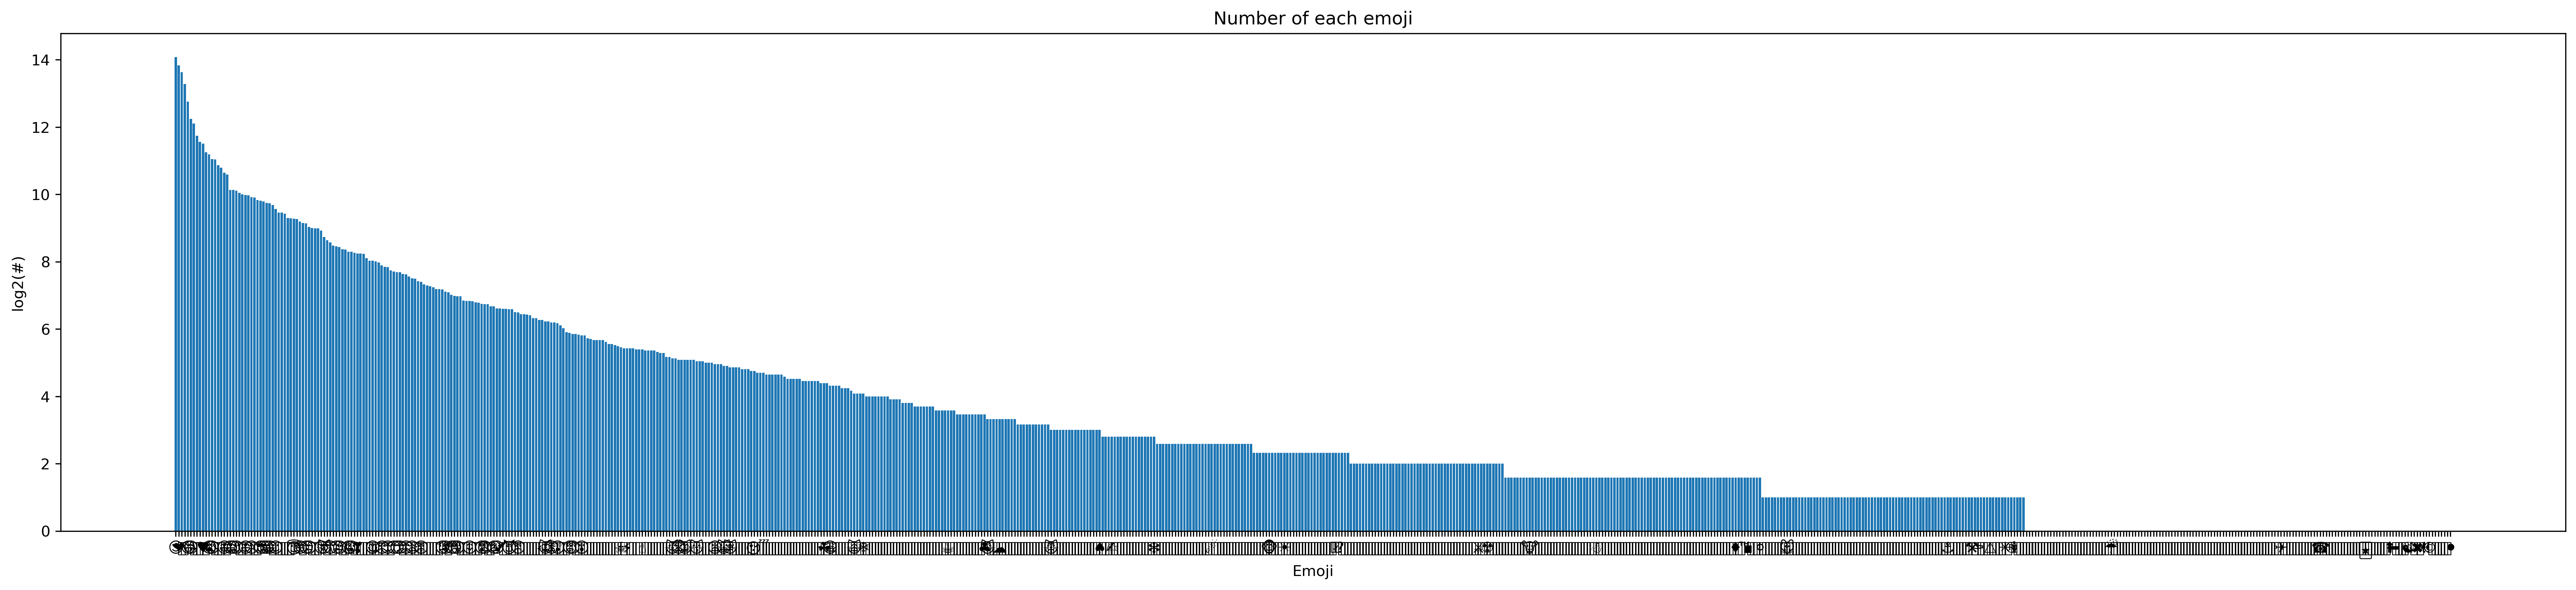

In [20]:
data_to_show = get_gt_value(emoji_dict, 0)

figure(figsize=(30, 6), dpi=300)

plt.bar(range(len(data_to_show)), np.log2(list(data_to_show.values())), align='center')
plt.xticks(range(len(data_to_show)), list(data_to_show.keys()))
plt.xlabel("Emoji")
plt.ylabel("log2(#)")
plt.title("Number of each emoji")
plt.show()

### Preprocessing

In [57]:
from wordcloud_fa import WordCloudFa
from __future__ import unicode_literals
import hazm
import tqdm
import random

In [66]:
class MyNormalizer(hazm.Normalizer):
    
    def __init__(self):
        super().__init__()
        self.aug_data_init()
        
    def aug_data_init(self):
        f = open('./../data/augmented_data.txt', 'r')
        self.aug_data = f.readlines()
        f.close()
        
    def my_normalizer(self, text):
        text = self.normalize(text)
        
        aug = {y[0]:y[1] for y in [x.replace('\n', '').split('\t') for x in self.aug_data]}

        for k in aug:
            while k in text:
                text = text.replace(k, aug[k])
        return text

<div style="direction:rtl;">پیش پردازش اولیه متن:</div>
<ul style="direction:rtl;">
  <li>حذف <code>n\</code> ها</li>
  <li>حذف <code>space</code> های اضافه ابتدا و انتهای متن</li>
  <li>شکستن متن از نقاط دارای <code>space</code></li>
</ul>  

In [67]:
comments = []
for comment in tqdm.tqdm(comments_with_emoji):
    comments.append(comment.replace("&#039;", "\'").replace('\n', '').strip().split())

head_list(comments, sep='\n')

100%|█████████████████████████████████████████████████████████████████████████| 90796/90796 [00:00<00:00, 177711.77it/s]

['توی', '۸', 'ساعت', 'مهلت', 'فیلم', '۲', 'بار', 'این', 'فیلم', 'بی', 'نظیر', 'را', 'دیدم،', 'واقعیت', 'جامعه', 'و', 'واقعا', 'و', 'به', 'شدت', 'با', 'احساساتم', 'بازی', 'شد،', 'حتما', 'پیشنهاد', 'میکنم.', 'کاش', 'بیشتر', 'از', 'این', 'فیلم', 'حمایت', 'میشد.', 'با', 'فیلم', 'های', 'هالیوودی', 'برابری', 'میکرد🤣🤣🤣']
['ارزش', 'دیدن', 'داره👌']
['پسندیدم', '👍']
['عااااااااالی', 'بود', '.', 'با', 'بازی', 'آقای', 'درخشانی', 'عزیز', 'عالی', 'ترم', 'شد', '.', 'خیلی', 'قشنگ', 'بود.لذت', 'بردم.👏👏👏']
['خیلی', 'خوب', 'بود👌👌']
['خوب', 'بود', '👏❤']


In [61]:
normalizer = MyNormalizer()

In [63]:
normalizer.my_normalizer("واقعااااا"), normalizer.my_normalizer("عاااالییییی"), normalizer.my_normalizer("عالیهههه")

('واقعا', 'عالی', 'عالیه')

<div style="direction:rtl;">نرمال سازی متن با استفاده از تابع <code>normalize</code> از کتابخانه <code>hazm</code></div> 

In [64]:

comments_normalized = [[normalizer.my_normalizer(y) for y in x] for x in tqdm.tqdm(comments)]


100%|███████████████████████████████████████████████████████████████████████████| 90796/90796 [00:19<00:00, 4769.76it/s]


In [65]:
for x in random.sample(comments_normalized, 50):
    print(' '.join(x))

ای جانم خانم مهین ترابی عزیز رو عشق است 😍🤗💚
عالی❤❤❤
آقای فرزاد فرزین یکتاست هم صداش عالیه❤ هم بازیگریش💙💌من یکی از طرف داره ویژه فرزاد جون هستم💌💞مثل همیشه عالی💞
عشق فقط یک کلام رونالدو بسه سلام❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤۷❤
💝💝💝💝💝
عالی🙏
ترسناک نبود :) من خیلی خوشم اومد 😂✨❤️
فوق العاده بود 👌🏻
بی نظیر❤
یه فیلم حال خوب کن و عالی 👌👌
واقعأ فیلمش عالی بود، متفاوت و پر از معنی. خیلی چیزا به چالش کشیده شد.. واقعأ یه اثر هنریه که باید ازش درس بگیریم، خیلی تأثیر گذار بود برام❤️
سلام ممنون از فیلیمو♥️در رحمان ۱۴۰۰ یکتا ناصر خیلی خوب بازی کرد ممنون😍😍
خیلی خوبه ایو خیلی خوب بازی میکنه 😍😍😍
عالی عالی عالی عالی بود❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
عالی ترین فیلم جهان بود پیشنهاد میکنم تا اخرش ببینید😍😍😍😍😍😍😍😍😍😍
واقعا قشنگ بود 👍🏻☺️
عالی بود 👍
واقعا زیبا خیلی ممنون🌹
پرنیانم عالی عالی بود 😍😗😗😙😙😙😚
خیلی قشنگ بود😍
فوق العاده بود بهتر از این نمیشه😍
عالی بود👍
عجب فیلمی بود پسر 😍😍😍😍😍😍😍
خبلب قشنگ بود 😍
نقش یوسف تیموریو خیلی تو این فیلم دوست داشتم😍خیلی گریم و لحن صحبت کردنش بامزه بود😂
من این فیلم را دوست دارم. 😍😍😍
خیلی زیبا 

In [218]:
comments_sentences = [sent_tokenize(' '.join(x)) for x in tqdm.tqdm(comments_normalized)]

100%|█████████████████████████████████████████████████████████████████████████| 89898/89898 [00:00<00:00, 382833.05it/s]


In [174]:
for x in random.sample(comments_sentences, 30):
    print(' ### '.join(x))

فیلم بدی نبود اما خوبم نبود ولی در کل دیدم 😅
من هنوز ندیدم ولی فکر کنم عالی، 🤔🤔🤔
خیلیییی برنامه ی جذابی هست من اول علاقه ای به دیدن این برنامه نداشتم ولی الان که دیدم خیلی خندیدم و خیلی زیاد چیزی یاد گرفتم ممنونم از سازندش و فیلیمو👏👏😍
اهنگشم عالی بود🥺🧡
تک وعالی 👌👌
قسمت اخرش خیلی رمز و راز داره من فکر میکنم جوری که پیر مرده رفتار میکرد یه دلیل قانع کننده داره برای این که بازی رو راه انداخته😂
عالیهعههه من ۱۲ سالمه و دارم میبینم طاقت نیووردم😁😂🧡
واقعا فوق العادست💙
عالیه 😍
من این فیلم رو ۳یا ۴ بار دیدم🤍🤍 خیلی ممنون و سپاسگذارم از سازندش🙏🏻🙏🏻🙏🏻🙏🏻
بسیار زیبا و تاثیر گذار بود 🙏❤
خیلی قشنگ بو د واقعا قشنگ بازی کردن 👌
باز هم از شاهنامه فیلم بسازید عاللللی بود👍👍
یعنی من ۸۰ میلیون بار این فیلم رو دیدم میخوام بازم ببینم ممنونم از سازندش 🌹🌹
خیلی فوق العاده بود حتما حتما ببینید ، مخصوصا آخرش موهای تنم سیخ شد 🤩🤩🤩
😑😑اینا چیه واقعا فیلمی که بشه حدس زد امتیازش صفره
عالی بود 😁
من اول توی اسپایدرمن با تام هالند اشنا شدم و ازش خوشم میاد خلاصه عالی بود😍😍😍😍😍
خییییییییییییییییییییییلی عالی بود😍😍😍😍😍😍😍😍😍
عالی بود

In [175]:
comments_tokens = [[word_tokenize(sent) for sent in sents] for sents in tqdm.tqdm(comments_sentences)]

100%|█████████████████████████████████████████████████████████████████████████| 89898/89898 [00:00<00:00, 113457.60it/s]


In [176]:
for x in random.sample(comments_tokens, 30):
    print(x)

[['خیلی', 'خوب', 'بود😂♥️']]
[['فیلم', 'عالیبازی', 'امیلی', 'کلارک', 'عالیه👌']]
[['روحت', 'شاد', 'حاج', 'قاسم🖤🖤🖤🖤']]
[['تاثیر', 'گذار', 'و', 'جذاب👌🏻']]
[['عالی', '👌👌👏👏👏❤️']]
[['واییی', 'عالی', 'بود', '😍😍😍😍😍کاملا', 'مشخصه😂😂', 'که', 'روش', 'فکر', 'شده']]
[['خیلی', 'خیلی', 'خیلی', 'خیلی', 'خیلی', 'خیلی', 'خیلی', 'خیلییییییییییییییییییییییفیلم', 'محشر', 'و', 'نابی', 'بود', 'فوق', 'العادس', 'بهترین', 'قسمتشه', '😍😍😍😍😍😍😇😇😇😇']]
[['عالی😻😻']]
[['فوق\u200cالعادست', '❤❤❤❤']]
[['این', 'سریال', 'هم', 'مثل', 'شهرزاد', 'می', 'ترکونه🤣🤣🤣']]
[['خیلی', 'عالی😍😍']]
[['بخدا', 'این', 'کمدی', 'ترین', 'فیلم', 'ترسناکی', 'بود', 'که', 'تا', 'حالا', 'دیدم', 'خیلی', 'خیلی', 'عالی', 'بود', 'بازم', 'از', 'این', 'نوع', 'بگذارید', 'مرسی', '😂😂😂']]
[['عالی', 'عالی', 'عالی', 'عالی', 'بود', 'بود', 'بود', 'بود', 'خیلی', 'خیلی', 'ممنون', 'فیلیمو🙏🙏🙏🙏🙏🙏❤❤❤💓']]
[['عالی', 'عالی', '😍😍😍😍😍😍😍😍😍😍🌋']]
[['عالی', 'بود', 'و', 'اینکه', 'آخر', 'فیلم', 'مبهوت', 'باقی', 'موندم', 'ولی', 'به', 'نظرم', 'تدی', 'دیوانه', 'نبود☹️😍']]
[['خیلی', 'خیل

In [16]:
comments['title'][0].split('|')[0]

'فیلم قدغن'

In [18]:
contain_values = comments[comments['title'].str.contains(comments['title'][0].split('|')[0])]
f = open('./../result/test_cloud.txt', 'w')
for comment in contain_values['comment']:
    f.write(f'{comment}\n')
f.close()

In [24]:
f = open('./../result/test_cloud.txt', 'r')
text = ''
for t in f.readlines():
    text = f'{text} {t}'
f.close()

text = text.replace('\n', ' ')
text

' دیدن این فیلمو به همه پیشنهاد میکنم.متاسفانه هستن هوس بازای پولداری که فک میکنن میشه عفت و آبرو رو با پول خرید.و یه نقش متفاوت از سام درخشانی  خییلی قشنگ بودیکی از بهترین پایان هایی بود که تاحالا دیدمآخرش با کار مرتضی از ته دل دلم خنگ شد  درسته غمگین بود ولی زیبا بود پیشنهاد میکنم ببینید و نیدونم چرا رای کم آورده حقش خیلی بیشتره و به نظر من باید جایزه های زیادی میبرد  توی ۸ ساعت مهلت فیلم ۲ بار این فیلم بی نظیر را دیدم، واقعیت جامعه و واقعا و به شدت با احساساتم بازی شد، حتما پیشنهاد میکنم. کاش بیشتر از این فیلم حمایت میشد. با فیلم های هالیوودی برابری میکرد🤣🤣🤣  ارزش وقت گذاشتن رو داره پشیمون نمیشین  بسیار فیلم قشنگی بود مخصوصا آخر فیلم خیلی خوب تمام شد عااالی  عاالی بود   بسیار زیبا بود   عالی و اموزنده  ارزش دیدن داره👌  خیلی قشنگه، عالی  عالی،حتما ببینین.  خیلی خوب بود  عالی بود واقعا پیشنهاد میکنم ببینیم فقط نمیدونم چرا رای کم آورده   خوب بود، ارزش دیدن داشت.   بسیار عالی   قشنگ بود  پسندیدم 👍  خیلی قشنگ بود و لذت بردم بازی سام درخشانی عالی بود   واقعا عالی بود   خیلی خوب بود.  خیلی

In [40]:
wordcloud = WordCloudFa(persian_normalize=True, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
image.show()

In [5]:
movies = pd.read_csv("./../result/movies.txt", names=["genre", "url"], delimiter='\t')
movies

,genre,url
0,drama,https://www.filimo.com/m/0v9if
1,drama,https://www.filimo.com/m/i3uga
2,drama,https://www.filimo.com/m/p8yhg
3,drama,https://www.filimo.com/m/vsucQ
4,drama,https://www.filimo.com/m/6lx40
...,...,...
4938,theatre,https://www.filimo.com/m/y078s
4939,theatre,https://www.filimo.com/m/0yiac
4940,theatre,https://www.filimo.com/m/ildr4
4941,theatre,https://www.filimo.com/m/eqwkc


In [6]:
genres = ["drama", "war", "adventure", "sci-fi", "romance", 
          "horror", "mystery", "family", "musical", "talk-show", 
          "short", "reality-tv", "history", "action", "fantasy", 
          "comedy", "western", "crime", "thriller", "sport", 
          "documentary", "music", "religious", "concert", 
          "biography", "theatre"]

num = {}
for m in genres:
    num[m] = 0
for m in movies["genre"]:
    num[m] += 1
num

{'drama': 752,
 'war': 82,
 'adventure': 483,
 'sci-fi': 113,
 'romance': 150,
 'horror': 200,
 'mystery': 165,
 'family': 234,
 'musical': 49,
 'talk-show': 70,
 'short': 152,
 'reality-tv': 35,
 'history': 111,
 'action': 569,
 'fantasy': 118,
 'comedy': 415,
 'western': 28,
 'crime': 381,
 'thriller': 236,
 'sport': 50,
 'documentary': 228,
 'music': 30,
 'religious': 42,
 'concert': 18,
 'biography': 208,
 'theatre': 24}

In [17]:
num['drama'] + num['war'] + num['adventure'] + num['sci-fi'] + num['romance'] \
+ num['horror'] + num['mystery'] + num['family'] + num['musical'] + num['talk-show'] \
+ num['short'] + num['reality-tv'] + num['history'] + num['action'] + num['fantasy'] \
+ num['comedy'] + num['western'] + num['crime'] + num['thriller'] + + num['sport'] \
+ num['documentary']


4621